### insert necessary libraries

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# from mlxtend.preprocessing import TransactionEncoder
import mlxtend.frequent_patterns as ml

### import dataframe

In [24]:
data = pd.read_csv('D:/year 3/hk1/datasets/fp-growth/market.csv',sep=';')
min_support=0.1
data

,Bread,Honey,Bacon,Toothpaste,Banana,Apple,Hazelnut,Cheese,Meat,Carrot,...,Milk,Butter,ShavingFoam,Salt,Flour,HeavyCream,Egg,Olive,Shampoo,Sugar
0,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,1,1,1,0,1,1,1,0,0,0,...,1,1,0,0,1,0,0,1,1,0
2,0,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,0,0,1
3,1,1,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0,1,1,0,0,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,0
460,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
461,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
462,1,0,0,1,1,0,1,1,0,1,...,1,0,0,0,1,0,1,1,0,1


### brief overview of the dataframe

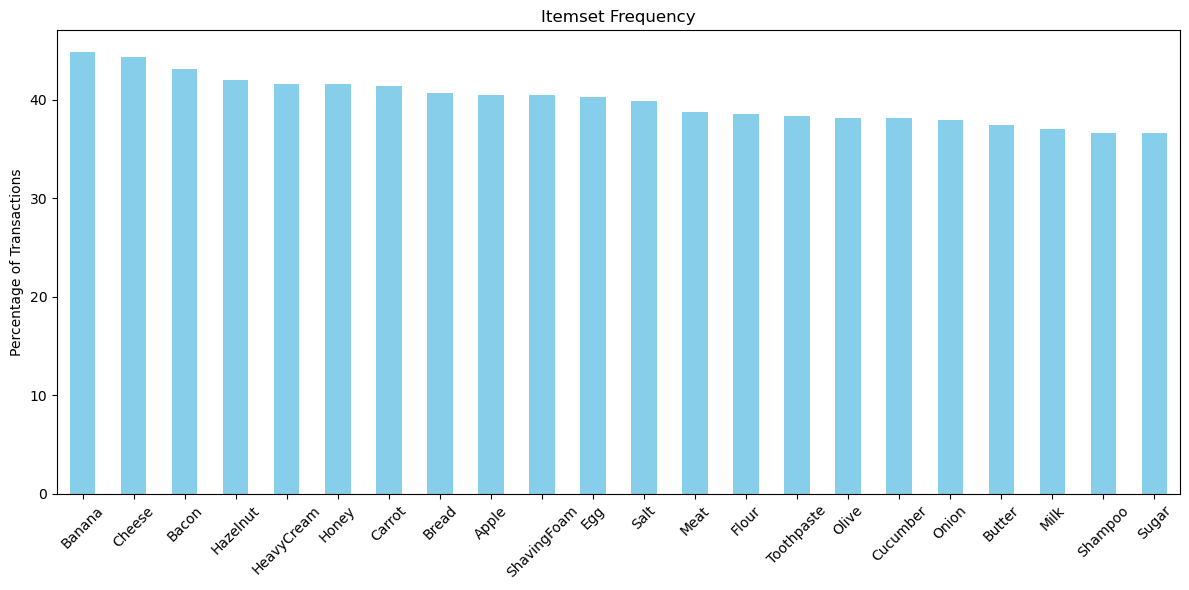

In [25]:
itemset_frequency = data.mean() * 100
# Create a bar plot
plt.figure(figsize=(12, 6))
itemset_frequency.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Itemset Frequency')
plt.ylabel('Percentage of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### apply mlxtend.frequent_patterns library in using fp_growth method
preprocessing data: dataframe must be transform to the correct in order to process by the given library 

In [26]:
df_encoded=data.map(lambda x: x==1)
print("the correct dataframe:")
df_encoded

the correct dataframe:


,Bread,Honey,Bacon,Toothpaste,Banana,Apple,Hazelnut,Cheese,Meat,Carrot,...,Milk,Butter,ShavingFoam,Salt,Flour,HeavyCream,Egg,Olive,Shampoo,Sugar
0,True,False,True,False,True,True,True,False,False,True,...,False,False,False,False,False,True,True,False,False,True
1,True,True,True,False,True,True,True,False,False,False,...,True,True,False,False,True,False,False,True,True,False
2,False,True,True,True,True,True,True,True,True,False,...,True,False,True,True,True,True,True,False,False,True
3,True,True,False,True,False,True,False,False,False,False,...,True,False,False,False,True,False,True,True,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,False,True,True,False,False,True,True,True,True,True,...,True,True,False,False,True,True,True,True,True,False
460,False,False,True,False,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,False,True
461,False,False,False,False,False,True,False,True,True,False,...,True,False,False,False,False,False,True,False,False,False
462,True,False,False,True,True,False,True,True,False,True,...,True,False,False,False,True,False,True,True,False,True


use ml.fpgrowth function

In [27]:
frequent_itemsets = ml.fpgrowth(df_encoded, min_support=min_support, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.448276,(Banana)
1,0.431034,(Bacon)
2,0.420259,(Hazelnut)
3,0.415948,(HeavyCream)
4,0.413793,(Carrot)
...,...,...
544,0.105603,"(Apple, Onion, Olive)"
545,0.109914,"(Onion, Banana, Olive)"
546,0.114224,"(Onion, Carrot, Cheese)"
547,0.107759,"(Onion, Carrot, Banana)"


### implement a FP-growth tree for visual demonstraion
for demonstation purposes, let reduce the size of the process data by increase the min_support value equal to carrots 

In [28]:
print(itemset_frequency['Hazelnut'])
print(itemset_frequency['HeavyCream'])
min_support=itemset_frequency['Hazelnut']/100-0.25

42.025862068965516
41.5948275862069


filter out all items that below the min_support

In [29]:
# filtered_df = data.loc[:, data.mean()*100 >= min_support].sort_values(ascending=False)
# filtered_df = filtered_df.sort_values(by=filtered_df.columns[0], ascending=False)
# encoded_filtered_df=filtered_df.map(lambda x: x==1)
# encoded_filtered_df

# Calculate the mean values for each column
mean_values = data.mean()

# Filter columns based on the min_support condition
filtered_columns = mean_values[mean_values >= min_support].index
filtered_df = data[filtered_columns]

# Sort the filtered_df columns based on the mean values in descending order
sorted_columns = mean_values[filtered_columns].sort_values(ascending=False).index
filtered_df = filtered_df[sorted_columns]
encoded_filtered_df=filtered_df.map(lambda x: x==1)
encoded_filtered_df



,Banana,Cheese,Bacon,Hazelnut,HeavyCream,Honey,Carrot,Bread,Apple,ShavingFoam,...,Meat,Flour,Toothpaste,Olive,Cucumber,Onion,Butter,Milk,Shampoo,Sugar
0,True,False,True,True,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,True,True,False,True,False,True,True,False,...,False,True,False,True,True,False,True,True,True,False
2,True,True,True,True,True,True,False,False,True,True,...,True,True,True,False,True,True,False,True,False,True
3,False,False,False,False,False,True,False,True,True,False,...,False,True,True,True,True,True,False,True,True,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,False,True,True,True,True,True,True,False,True,False,...,True,True,False,True,False,True,True,True,True,False
460,False,False,True,True,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
461,False,True,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
462,True,True,False,True,False,False,True,True,False,False,...,False,True,True,True,True,False,False,True,False,True


### Modify input data to input to build the tree
the data input to the tree must be in the format [item2,item2,...,item2] instead of check list like previous table

In [30]:
def transform_dataframe(input_df):
    true_columns = []
    for index, row in input_df.iterrows():
        true_cols=[]
        for col in input_df.columns:
            if row[col]:
                true_cols.append(col)
        true_columns.append(true_cols)

    # Create a new DataFrame
    new_df = pd.DataFrame({
        'Items': true_columns
    })
    
    return new_df
new_df=transform_dataframe(encoded_filtered_df)
new_df

,Items
0,"[Banana, Bacon, Hazelnut, HeavyCream, Carrot, ..."
1,"[Banana, Bacon, Hazelnut, Honey, Bread, Apple,..."
2,"[Banana, Cheese, Bacon, Hazelnut, HeavyCream, ..."
3,"[Honey, Bread, Apple, Egg, Flour, Toothpaste, ..."
4,[Honey]
...,...
459,"[Cheese, Bacon, Hazelnut, HeavyCream, Honey, C..."
460,"[Bacon, Hazelnut, ShavingFoam, Egg, Meat, Sugar]"
461,"[Cheese, Apple, Egg, Meat, Milk]"
462,"[Banana, Cheese, Hazelnut, Carrot, Bread, Egg,..."


### build FP-growth tree

In [31]:
class FPTreeNode:
    def __init__(self, item, count=0):
        self.item = item
        self.count = count
        self.children = {}
        self.parent = None

class FPTree:
    def __init__(self):
        self.root = FPTreeNode('root')

    def insert(self, items, count=1):
        current_node = self.root
        for item in items:
            if item not in current_node.children:
                new_node = FPTreeNode(item, count)
                new_node.parent = current_node
                current_node.children[item] = new_node
            else:
                current_node.children[item].count+=count
            current_node = current_node.children[item]
    
    def mine_tree(self, min_support, num_transction, prefix=None):
        if prefix is None:
            prefix = []

        # Get frequent items in descending order
        item_count = self.get_item_count()
        frequent_items = {item: count for item, count in item_count.items() if count/num_transction >= min_support}
        if not frequent_items:
            return 
        sorted_items = sorted(frequent_items, key=lambda x: frequent_items[x], reverse=False)
        results = []
        if len(sorted_items)==1:
            results.append((prefix, frequent_items[sorted_items[0]]/num_transction))
            yield from results
            return

        for item in sorted_items:
            # Create new itemset
            # new_prefix = prefix + [item]
            # yield new_prefix  # Yield the current frequent itemset
            if prefix:
                if item==prefix[-1]:
                    results.append((prefix, item_count[prefix[-1]]/num_transction))
                    continue

            # Create conditional pattern base
            conditional_pattern_base = self.get_conditional_pattern_base(item)

            # Build a conditional FP-tree
            conditional_tree = FPTree()
            for path, count in conditional_pattern_base.items():
                conditional_tree.insert(path , count)  # Insert path multiple times based on count

            # if len(conditional_tree.root.children) == 1:
            # # Get the single child node
            #     single_child = next(iter(conditional_tree.root.children.values()))
            #     if single_child.count >= min_support:
            #         results.append((prefix + [single_child.item], single_child.count/464))
            #         yield from results
            #         continue

            # Recursively mine the conditional FP-tree
            results.extend(conditional_tree.mine_tree(min_support, num_transction, prefix+[item]))
        yield from results

    def get_item_count(self):
        # Count the frequency of each item in the FP-tree
        item_count = {}
        self._count_items(self.root, item_count)
        return item_count

    def _count_items(self, node, item_count):
        if node.item != 'root':
            item_count[node.item] = item_count.get(node.item, 0) + node.count
        for child in node.children.values():
            self._count_items(child, item_count)

    def get_conditional_pattern_base(self, item):
        # Get the conditional pattern base for a specific item
        patterns = {}
        self._collect_patterns(self.root, item, [], patterns)
        return patterns

    def _collect_patterns(self, node, target_item, current_path, patterns):
        if node.item == target_item:
            # Found the target item, add the path to the patterns
            path = current_path.copy()
            if path:  # Only if there's a path leading to this item
                patterns[tuple(path)] = patterns.get(tuple(path), 0) + node.count
                return

        for child in node.children.values():
            current_path.append(child.item)
            self._collect_patterns(child, target_item, current_path, patterns)
            current_path.pop()

    def draw(self, G, ax, node, pos=None, layer=0):
        if pos is None:
            pos = {node: (layer, 0)}
        else:
            pos[node] = (layer*0.1, len(pos)*0.1)
        labels = {node: f"{node.item}\n{node.count}"}
        for child in node.children.values():
            self.draw(G, ax, child, pos, layer + 1)
            labels[child] = f"{child.item}\n{child.count}"

        nx.draw_networkx_nodes(G, ax=ax, pos=pos, nodelist=[node], node_size=700, node_color='lightblue')
        nx.draw_networkx_labels(G, ax=ax, pos=pos, labels=labels)
        # Draw labels
        # labels = {node.item: str(node.item)}  # Assuming node has a meaningful string representation
        # nx.draw_networkx_labels(G, ax=ax, pos=pos, labels=labels)
        if node.parent is not None:
            ax.plot([pos[node][0], pos[node.parent][0]], [pos[node][1], pos[node.parent][1]], 'k-')

### FP-Growth Tree demonstration

In [32]:
fp_tree = FPTree()
for index, row in new_df.iterrows():
    #print(sorted(row['Items']))
    fp_tree.insert(sorted(row['Items']))

# Visualize the tree
if min_support>=0.41:
    G=nx.Graph()
    fig, ax = plt.subplots()
    fp_tree.draw(G, ax, fp_tree.root)
    plt.title('FP-Growth Tree')
    plt.axis('off')
    plt.show()

In [33]:
manual_frequent_itemsets = fp_tree.mine_tree(min_support, df_encoded.shape[0])
final_data = pd.DataFrame(manual_frequent_itemsets, columns=['Itemset', 'support'])
compare_data=ml.fpgrowth(df_encoded, min_support=min_support, use_colnames=True)
# final_data=final_data.loc[final_data['support']<0.2]
# compare_data=compare_data.loc[compare_data['support']<0.2]
final_data.sort_values(by='support',ascending=False)
compare_data.sort_values(by='support',ascending=False)
display(final_data)
display(compare_data)

,Itemset,support
0,"[Sugar, Egg]",0.170259
1,"[Sugar, Honey]",0.172414
2,"[Sugar, Bread]",0.174569
3,"[Sugar, Banana]",0.176724
4,"[Sugar, ShavingFoam]",0.178879
...,...,...
191,"[Cheese, Banana]",0.224138
192,[Cheese],0.443966
193,"[Banana, Apple]",0.219828
194,"[Banana, Bacon]",0.241379


,support,itemsets
0,0.448276,(Banana)
1,0.431034,(Bacon)
2,0.420259,(Hazelnut)
3,0.415948,(HeavyCream)
4,0.413793,(Carrot)
...,...,...
191,0.178879,"(Onion, Meat)"
192,0.176724,"(Onion, Honey)"
193,0.174569,"(Egg, Onion)"
194,0.174569,"(Onion, Olive)"
